# Fincon Rowing Session on Smart City and IoT
Dieses Beispiel zeigt, wie mit einfachem Code in Python Daten von Wetterstationen in der Region Bern ausgelesen und visualisiert werden können.

API Dokumentation: https://meteotest.github.io/urban-heat-API-docs/de/

Entwickelt im Rahmen des Projektes __[Smart Urban Heat Map Bern](https://smart-urban-heat-map.ch/)__.


## Teil 1 - Laden und Darstellen von aktuellen Daten

### Schritt 1: Importieren der benötigten Python Libraries

In [1]:
import io # for working with streams (like strings)
import requests # for making standard HTTP requests
import pandas as pd # for storing and manipulating data
import geopandas as gpd # for storing and manipulating geographic data
import folium # for creating maps
import branca # for using colorscales in Folium
import json # for data handling

### Schritt 2: Liste aller Messstationen abfragen

In [2]:
# Define the URL
url = "https://smart-urban-heat-map.ch/api/1.0/stations"

# Make the GET request
response = requests.get(url)

# Display the result
print(response.text)

{"type": "FeatureCollection", "features": [{"type": "Feature", "geometry": {"type": "Point", "coordinates": [7.44165, 46.96523]}, "properties": {"stationId": "1040CBFEFFE70FFE", "name": "Viererfeld 4 (Strasse Nord)", "dateObserved": "2023-10-11T11:21:50Z", "temperature": 22.153429, "relativeHumidity": 48.55863}}, {"type": "Feature", "geometry": {"type": "Point", "coordinates": [7.44009, 46.96286]}, "properties": {"stationId": "450551FEFF6E959E", "name": "Viererfeld 3 (Strasse S\u00fcd)", "dateObserved": "2023-10-11T11:21:48Z", "temperature": 22.503242, "relativeHumidity": 49.04883}}, {"type": "Feature", "geometry": {"type": "Point", "coordinates": [7.448146, 46.93012]}, "properties": {"stationId": "B8D350FEFF6E959E", "name": "Wabern Zentrum Laterne", "dateObserved": "2023-10-11T11:21:42Z", "temperature": 24.084078, "relativeHumidity": 43.618523}}, {"type": "Feature", "geometry": {"type": "Point", "coordinates": [7.43714, 46.9517]}, "properties": {"stationId": "D53FCBFEFFE70FFE", "name"

Umformatierung für bessere Lesbarkeit:

In [4]:
print(json.dumps(response.json(), indent=2))

{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "geometry": {
        "type": "Point",
        "coordinates": [
          7.44165,
          46.96523
        ]
      },
      "properties": {
        "stationId": "1040CBFEFFE70FFE",
        "name": "Viererfeld 4 (Strasse Nord)",
        "dateObserved": "2023-10-11T11:21:50Z",
        "temperature": 22.153429,
        "relativeHumidity": 48.55863
      }
    },
    {
      "type": "Feature",
      "geometry": {
        "type": "Point",
        "coordinates": [
          7.44009,
          46.96286
        ]
      },
      "properties": {
        "stationId": "450551FEFF6E959E",
        "name": "Viererfeld 3 (Strasse S\u00fcd)",
        "dateObserved": "2023-10-11T11:21:48Z",
        "temperature": 22.503242,
        "relativeHumidity": 49.04883
      }
    },
    {
      "type": "Feature",
      "geometry": {
        "type": "Point",
        "coordinates": [
          7.448146,
          46.93012
   

Laden der Daten als GeoPandas Dataframe macht das ganze noch einfacher:

In [5]:
stations = gpd.read_file(response.text)

# Display stations DataFrame
stations

,stationId,name,dateObserved,temperature,relativeHumidity,geometry
0,1040CBFEFFE70FFE,Viererfeld 4 (Strasse Nord),2023-10-11 11:21:50+00:00,22.153429,48.558630,POINT (7.44165 46.96523)
1,450551FEFF6E959E,Viererfeld 3 (Strasse Süd),2023-10-11 11:21:48+00:00,22.503242,49.048830,POINT (7.44009 46.96286)
2,B8D350FEFF6E959E,Wabern Zentrum Laterne,2023-10-11 11:21:42+00:00,24.084078,43.618523,POINT (7.44815 46.93012)
3,D53FCBFEFFE70FFE,Länggasse Falkenweg,2023-10-11 11:21:41+00:00,21.643396,49.775540,POINT (7.43714 46.95170)
4,B3C450FEFF6E959E,Gümligen Dentenberg Laterne,2023-10-11 11:21:37+00:00,23.822386,42.376823,POINT (7.50944 46.93770)
...,...,...,...,...,...,...
106,1440CBFEFFE70FFE,Bremgartenfriedhof,2023-10-11 11:04:30+00:00,23.429846,44.194553,POINT (7.42015 46.95030)
107,62E350FEFF6E959E,Köniz Gartenstadt Laterne,2023-10-11 11:04:11+00:00,25.704967,43.013885,POINT (7.40896 46.92981)
108,FCE350FEFF6E959E,Köniz Bläuacker Kandelaber auf Platz,2023-10-11 11:03:59+00:00,23.368430,42.117416,POINT (7.41466 46.92327)
109,FED550FEFF6E959E,Köniz Bläuacker Park Aldi/Swisscom,2023-10-11 10:57:43+00:00,22.190815,45.342793,POINT (7.41453 46.92282)


### Schritt 3: Darstellen auf einer Karte

Zuerst zeigen wir eine Karte an, die alle Messstationen abdeckt:


In [7]:
# Create a base map
map1 = folium.Map(location=[stations.geometry.y.mean(), stations.geometry.x.mean()], zoom_start=10)

# Display map
map1

Jetzt zeichnen wir die Messstationen ein:

In [9]:
# Create a base map
map2 = folium.Map(location=[stations.geometry.y.mean(), stations.geometry.x.mean()], zoom_start=10)

# Iterate through each station in the GeoPandas DataFrame
for idx, station in stations.iterrows():
    # Create a circle marker for each station and add it to the map
    folium.CircleMarker(
        # Location of the marker in lat and lon
        location=(station.geometry.y, station.geometry.x),
        # Styling the marker
        radius=5,
        color="black",  # Border color
        weight=0.5,  # Border width
        fill=True,
        fill_color="black",
        fill_opacity=1, # 1 means 100% opaque
        # Add a tooltip with station name
        tooltip=f"{station['name']}",
    # Add the marker to the map
    ).add_to(map2)
    
map2

Und zum Schluss können wir den Messpunkten eine von der aktuellen Temperatur abhängige Farbe geben und auch Tooltips hinzufügen:


In [11]:
# Create a base map
map3 = folium.Map(location=[stations.geometry.y.mean(), stations.geometry.x.mean()], zoom_start=13)#, tiles="CartoDB positron")

# Most popular colormaps are sequential, meaning that they have a start and end color
# Define a function to reverse a colormap
def reversed_colormap(existing):
    return branca.colormap.LinearColormap(
        colors=list(reversed(existing.colors)),
        vmin=existing.vmin, vmax=existing.vmax
    )

def formatToolTip(stationName, temperature, humidity):
    return f"{stationName}: {temperature:.2f}°C, {humidity:.2f}%"

def formatToolTip2(stationName, temperature, humidity):
    return f"<h4>{stationName}</h4>Temperatur: {temperature:.2f}°C<br/>Luftfeuchtigkeit: {humidity:.2f}%"


# Create a colormap for a temperature range of 10-37°C
# Choose an appropriate colormap (Spectral_11) and reverse it so that it goes from blue (cold) to red (hot)
colormap = reversed_colormap(branca.colormap.linear.Spectral_11)
# Scale the colormap to the temperature range and discretize it into 9 steps for better visibility
colormap = colormap.scale(10, 37).to_step(9) 
# Add a caption to the colormap
colormap.caption = "Temperature (°C)"
# Add colormap to the map
colormap.add_to(map3)

# Iterate through each station in the GeoPandas DataFrame
for idx, station in stations.iterrows():
    # Create a circle marker for each station and add it to the map
    folium.CircleMarker(
        # Location of the marker in lon and lat
        location=(station.geometry.y, station.geometry.x),
        # Styling the marker
        radius=5,
        color="black",  # Border color
        weight=0.5,  # Border width
        fill=True,
        # Set the fill color to the colormap value corresponding to the station temperature
        fill_color=colormap(station['temperature']),
        fill_opacity=1, # 1 means 100% opaque
        # Add a tooltip with station name and temperature
        tooltip=formatToolTip2(station['name'], station['temperature'], station['relativeHumidity'])
    # Add the marker to the map
    ).add_to(map3)

# Display map
map3

## Teil 2 - Zeitlichen Messdatenverlauf darstellen

### Schritt 1: Daten zu einer Messstation laden

Z.B. am Bundesplatz:

In [46]:
# Based on a station name, get the respective stationId from the DataFrame
stationId = stations[stations["name"] == "Bundesplatz"].stationId.values[0]
# Define the URL including the stationId argument
url = f"https://smart-urban-heat-map.ch/api/1.0/timeseries?stationId={stationId}"

# Define the headers to request CSV data as a python dictionary
headers = {
    "Accept": "text/csv"
}

# Make the GET request with the headers
response = requests.get(url, headers=headers)

# Get the timeseries into a data frame
timeseries = pd.read_csv(io.StringIO(response.text), delimiter=";")

timeseries

,dateObserved,temperature,relativeHumidity
0,2023-10-07T15:47Z,23.515297,40.784160
1,2023-10-07T15:57Z,23.304340,42.477913
2,2023-10-07T16:07Z,22.821012,44.972763
3,2023-10-07T16:17Z,22.732891,45.356144
4,2023-10-07T16:27Z,22.698177,44.934616
...,...,...,...
287,2023-10-09T14:57Z,27.678339,41.756924
288,2023-10-09T15:07Z,27.563517,41.554740
289,2023-10-09T15:17Z,26.949340,44.299458
290,2023-10-09T15:27Z,26.671625,43.708170


### Schritt 2: Daten grafisch darstellen

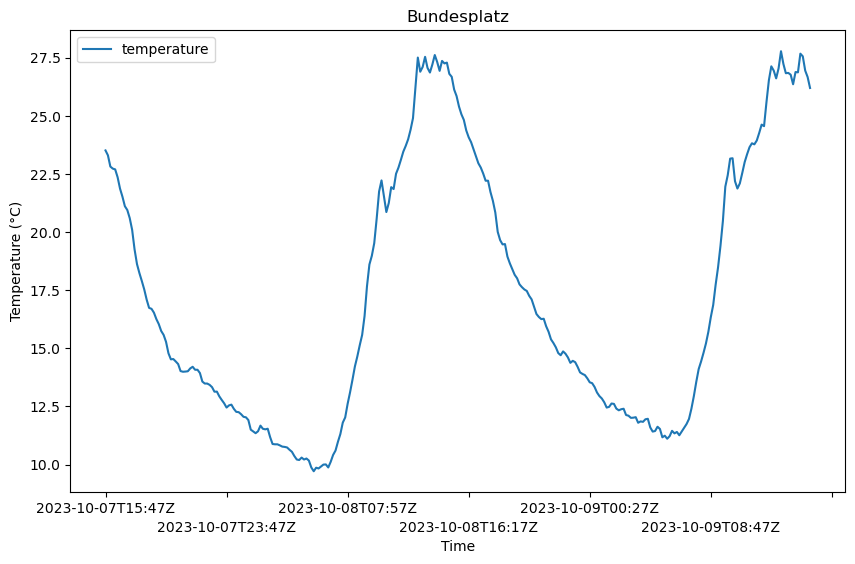

In [48]:
# Use the DataFrame plot function to plot the temperature time series as a line plot with markers
ax = timeseries.plot(x='dateObserved', y='temperature', figsize=(10,6), marker=None, linestyle='-')
# The ax object is a matplotlib axis object which we can use to further customize the plot

# Add a title
ax.set_title('Bundesplatz')

# Add labels for the x and y axes
ax.set_xlabel('Zeit')
ax.set_ylabel('Temperatur (°C)')

# Shift every second x-label for better readability
for i, label in enumerate(ax.get_xticklabels()):
    if i % 2 == 0:  # Check if it's an odd tick
        label.set_y(-0.04)

### Schritt 3: Daten von mehreren Stationen anzeigen
Zuerst legen wir den Zeitraum fest:

In [53]:
startTime = "2023-09-28T00:00:00Z" # 28.09.23 00:00 ; Z means UTC time
endTime = "2023-09-30T23:00:00Z" # 31.09.23 23:00

Jetzt lesen wir die Daten:

Text(0, 0.5, 'Temperatur (°C)')

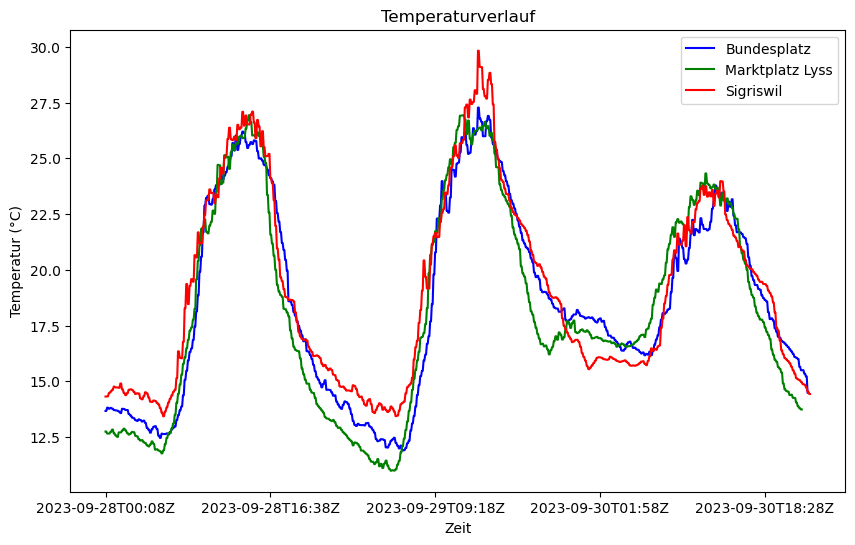

In [61]:
import matplotlib.pyplot as plt

# Define function to read the data for a specific statio and a specific time range.
# Returns the data as a Pandas dataframe
def getData(stationName, startTime, endTime):
    #Define the headers to request CSV data as a python dictionary
    headers = {
        "Accept": "text/csv"
    }

    # Read the data
    stationId = stations[stations["name"] == stationName].stationId.values[0]
    # Define the URL including the stationId argument
    url = f"https://smart-urban-heat-map.ch/api/1.0/timeseries?stationId={stationId}&timeFrom={startTime}&timeTo={endTime}"

    # Make the GET request with the headers
    response = requests.get(url, headers=headers)
    return pd.read_csv(io.StringIO(response.text), delimiter=";")

# Read the data for the 3 stations:
timeseries1 = getData("Bundesplatz", startTime, endTime)
timeseries2 = getData("Marktplatz Lyss", startTime, endTime)
timeseries3 = getData("Sigriswil", startTime, endTime)

# Now plot the data
plt.figure(figsize=(10, 6))
        
        
# Use the DataFrame plot function to plot the temperature time series as a line plot with markers
timeseries1.plot(x='dateObserved', y='temperature', label="Bundesplatz", marker=None, color='blue', linestyle='-', ax=plt.gca())
timeseries2.plot(x='dateObserved', y='temperature', label="Marktplatz Lyss", marker=None, color='green', linestyle='-', ax=plt.gca())
timeseries3.plot(x='dateObserved', y='temperature', label="Sigriswil", marker=None, color='red', linestyle='-', ax=plt.gca())

plt.title('Temperaturverlauf')
plt.xlabel('Zeit')
plt.ylabel('Temperatur (°C)')



